In [ ]:
# Install nltk (for stopwords)
!pip install nltk

# Import libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download stopwords if needed
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load CSV
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
X = df['message']
y = df['label_num']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [ ]:
vectorizer = CountVectorizer(stop_words='english')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)


Accuracy: 0.9832535885167464

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.95      0.92      0.94       219

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



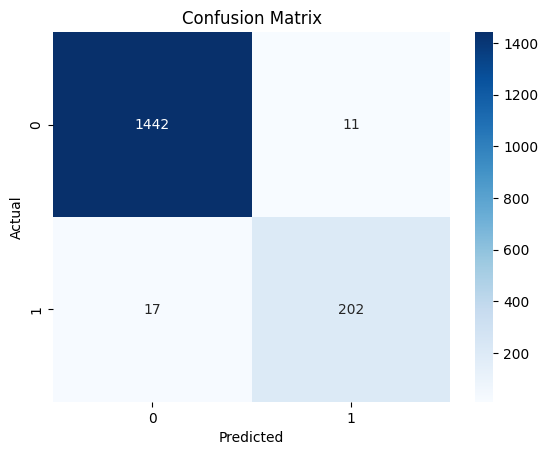

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
def predict_message(msg):
    msg_vec = vectorizer.transform([msg])
    prediction = model.predict(msg_vec)[0]
    return 'Spam' if prediction == 1 else 'Ham'

# Get user input
while True:
    user_msg = input("\nEnter your email/message (Type 'exit' to stop):\n")
    if user_msg.lower() == 'exit':
        print("Exiting...")
        break

    # Predict and display result INSIDE the loop
    result = predict_message(user_msg)
    print(f"\nThis message is: {result}")



Enter your email/message (Type 'exit' to stop):
Congratulations! You’ve won a free vacation. Call now.

This message is: Spam

Enter your email/message (Type 'exit' to stop):
exit
Exiting...
